# Visualising The Chicago Crime Data

To get a better understanding of the Chicago Crime Dataset it will be helpful to visualise the data.

In [1]:
# Import Pandas
import pandas as pd

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

In [2]:
# Import the Pickle of the DataFrame
df_crimes = pd.read_pickle('./capstone_pickles/crimes.pkl')

### Number of Crimes per month

Text(0,1,'Count of Cases Per Month')

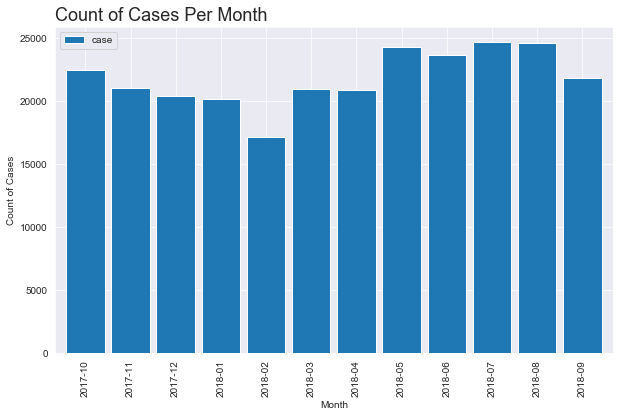

In [3]:
# Group the Crimes per month and produce a bar chart
df_crimes.groupby('year_month').count().plot(y = 'case', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Unsuprisingly there little obvious variation in the number of crimes committed per month other than an apparent drop-off in February. 

### Number of crimes occuring on each day

Text(0,1,'Count of Cases Per Day of Week [1 is a Tuesday]')

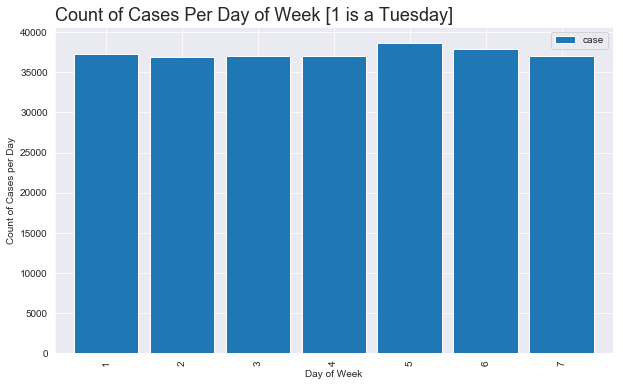

In [4]:
# Group the Crimes per day and produce a bar chart
df_crimes.groupby('day').count().plot(y = 'case',
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      colormap='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Tuesday]', loc='left', fontsize=18)

There is a small increase in crime reported at the weekend, Saturday and Sunday, but nothing that couldbe considered significant.

### Number of crimes occuring in each hour

Text(0,1,'Count of Cases Per Hour]')

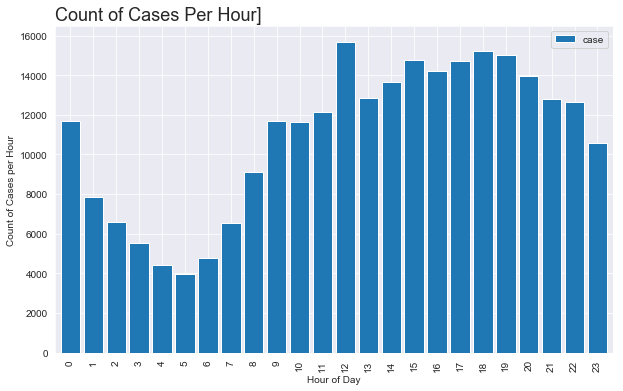

In [5]:
# Group the Crimes per hour and produce a bar chart
df_crimes.groupby('hour').count().plot(y = 'case',
                                       kind='bar',
                                       figsize=(10,6),
                                       width=0.85,
                                       colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after eight in the morning. There appears to be a spike around midday.

### Now let's look at the Crime Categories.

In [6]:
# Number of unique Crime categories bases on the Primary Description
df_crimes.primary_description.nunique()

32

In [7]:
# What Crimes are the 10 most commonly occuring ones 
df_crimes[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(10)

,primary_description,case
30,THEFT,63799
2,BATTERY,49404
6,CRIMINAL DAMAGE,27871
1,ASSAULT,19892
8,DECEPTIVE PRACTICE,17525
23,OTHER OFFENSE,16519
3,BURGLARY,12034
17,NARCOTICS,11840
27,ROBBERY,10513
16,MOTOR VEHICLE THEFT,10428


In [8]:
# What Crimes are the 3 most commonly occuring ones 
df_crimes[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(3)

,primary_description,case
30,THEFT,63799
2,BATTERY,49404
6,CRIMINAL DAMAGE,27871


In [9]:
# Create a list of the 3 most commonly occuring crimes
top_ten_crimes = df_crimes[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df_crimes[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:3].axes[0].tolist()

In order to get a better understanding of the top three crimes lets first create  smaller dataframe the only contains these top crimes. Next we'll visualise these crimes using area charts.

Text(0,1,'Count of Top 3 Cases Per Month')

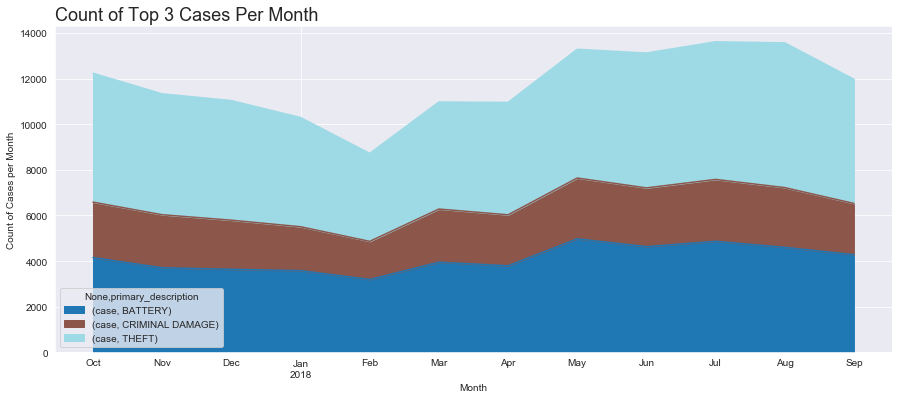

In [10]:
# Create a new data frame with just the top 10 crimes
df_top10_crimes = df_crimes[df_crimes['primary_description'].isin(top_ten_crimes)].copy()

# Create a new data frame with just the top 3 crimes
df_top3_crimes = df_crimes[df_crimes['primary_description'].isin(top_three_crimes)].copy()

# Create a pivot area chart of the crimes per month
df_top3_crimes[['case', 'primary_description', 'year_month']].pivot_table(
    index='year_month', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases per Month')
plt.title('Count of Top 3 Cases Per Month', loc='left', fontsize=18)

It would appear that crimes peak in the Summer months and then fall off in Winter. Now look per day.

Text(0,1,'Count of Top 3 Cases Per Day')

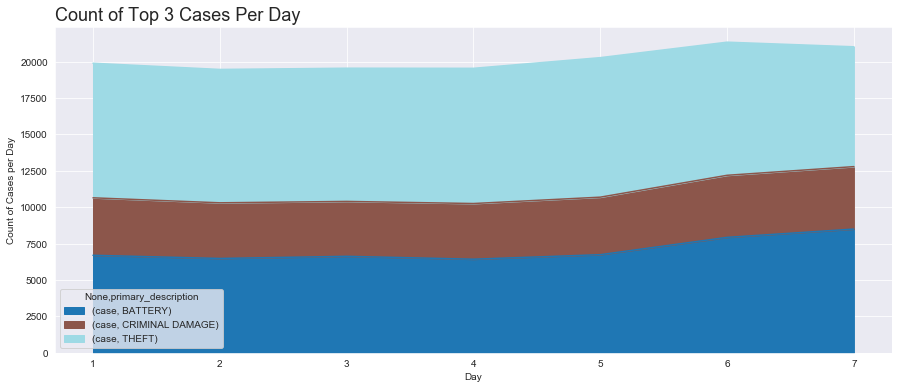

In [11]:
# Create a pivot area chart of the crimes per day
df_top3_crimes[['case', 'primary_description', 'day']].pivot_table(
    index='day', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Top 3 Cases Per Day', loc='left', fontsize=18)

This chart suggests that Saturday, Sunday & Monday (Tuesday is Day 1) have more more crime but that this increase is driven by the crime of Battery. Finally lets look per hour.

Text(0,1,'Count of Top 3 Cases Per Hour')

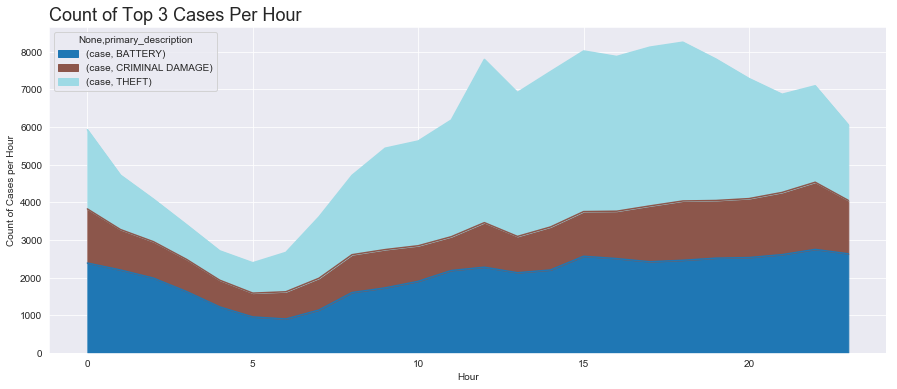

In [12]:
# Create a pivot area chart of the crimes per hour
df_top3_crimes[['case', 'primary_description', 'hour']].pivot_table(
    index='hour', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Top 3 Cases Per Hour', loc='left', fontsize=18)

It would appear that 5:00 am in the morning is the safest time in Chicago whilst 6:00 pm in the afternoon / evening is the most dangerous.

### Create a folium map with a different colour per crime

Colour each of the top 10 crimes with a different and plot on a Folium map.

In [13]:
# Create a list of 10 colours. 
# We have  list of the top 10 crimes from earlier
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours = dict(zip(top_ten_crimes, colors))

The entire `df_top10_crimes` DataFrame contains too many point to disply effeciently using Folium. To combat this we will just use the data from August 2018.

In [14]:
# Add the colours colums to the df_top_crimes DataFrame
df_top10_crimes['colour'] = df_top10_crimes.primary_description.map(dict_colours)

# Filter the top 10 crimes dataframe to extract August only
df_top_crimes_august = df_top10_crimes[df_top10_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top_crimes_august.to_pickle('./capstone_pickles/topcrimes_august.pkl')

In [ ]:
# Define Chicago's geolocation coordinates
chicago_latitude = 41.85  
chicago_longitude = -87.75

# Define the world map centered around Chicago with a higher zoom level
chicago_map = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top_crimes_august.latitude, 
                         df_top_crimes_august.longitude, 
                         df_top_crimes_august.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
chicago_map.add_child(incidents)

In [ ]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
chicago_cluster = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.primary_description))
 
chicago_cluster.add_child(mc)
chicago_cluster

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

chicago_heatmat = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

# Display the map
chicago_heatmat